# Spiral Galaxy evolution

Simple spiral galaxy formation simulation, based on PARTICLE SIMULATION OF SPIRAL GALAXY EVOLUTION by D. Greenspan.

Aims:
- simple simulations
- form some of the different types via different intial conditions
- animation?
- upgrade barnes hut?

In [54]:
import numpy as np
import itertools
import matplotlib.pyplot as plt

#why is it so unstable? The sums for the force are wrong
# I think the problem is just the accuracy of the simulation


In [55]:
G = 0.0001

In [56]:
class Galaxy:
    def __init__(self,r0,v0,Ms,alpha,beta,p,q,D,N,tN,sDim):
        assert r0.shape == v0.shape
        self.pNum = r0.shape[0]

        assert r0.shape[1] == sDim
        self.sDim = sDim

        assert Ms.shape[0] == r0.shape[0]
        self.Ms = Ms

        assert D >= 0
        self.alpha = alpha
        self.beta = beta
        self.D = D
        self.p = p
        self.q = q
        
        h = tN/N
        self.ts = np.arange(0,N,step=h)
        self.rs = np.empty([N,self.pNum,self.sDim])
        self.rs[0] = r0
        self.vs = np.empty([N,self.pNum,self.sDim]) 
        self.vs[0] = v0 + 0.5*h*self.getAs(t=0)

        for t in range(N-1):
            self.rs[t+1] = self.rs[t] + h*self.vs[t]
            self.vs[t+1] = self.vs[t] + h*self.getAs(t)
            print(t)

    def getAs(self,t):
        assert type(t) == int
        rst = self.rs[t]

        Fijs = np.zeros([self.pNum,self.pNum,self.sDim])
        for i in range(self.pNum):
            for j in range(i):
                rij = rst[i] - rst[j]
                rijMag = np.linalg.norm(rij)
                if rijMag > self.D:
                    Fijs[i,j] = -G*self.Ms[i]*self.Ms[j]*rij/(rijMag**3) #may get negative errors here, very little depenedence on sign
                else:
                    Fijs[i,j] = (-self.alpha/(rijMag**self.p) + self.beta/(rijMag**self.q))*self.Ms[i]*self.Ms[j]*rij/rijMag
                Fijs[j,i] = -Fijs[i,j]
        
        As = np.empty([self.pNum,self.sDim])
        for i in range(self.pNum):
            As[i] = np.sum(Fijs[i],axis=0)/self.Ms[i]

        return As
    


In [57]:
#intial conditions from example 1
alpha = beta = 0.2 #should generalise this to form any ellipical properties as I want to investigate this
p = 2
q = 4
D = 1.4
w = np.array([0,0,0.75])

a = 2
b = 1.5

r0s = []
Ms = []
v0s = []
for i,j in itertools.product(range(-100,100), repeat=2):
    r = np.array([i,j])
    if r @ r <= 200:
        if (r[0]/a)**2 + (r[1]/b)**2 <= 1:
            Ms.append(100)
            v0s.append(np.cross(w,np.array([i,j,0]))[:2])
        else:
            Ms.append(1)
            v0s.append((10**-7)*np.random.uniform(-1,1,2)) 
        r0s.append(r)

r0s = np.array(r0s)
Ms = np.array(Ms)
v0s = np.array(v0s)
L = np.array(L)



In [58]:
g = Galaxy(r0s,v0s,Ms,alpha,beta,p,q,D,100,3,2)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98


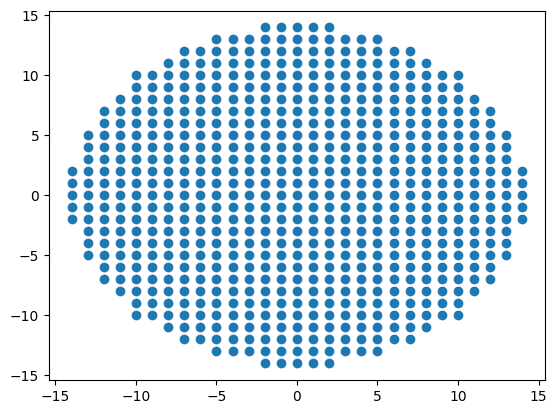

In [59]:
plt.scatter(g.rs[0,:,0],g.rs[0,:,1])

(-15.0, 15.0)

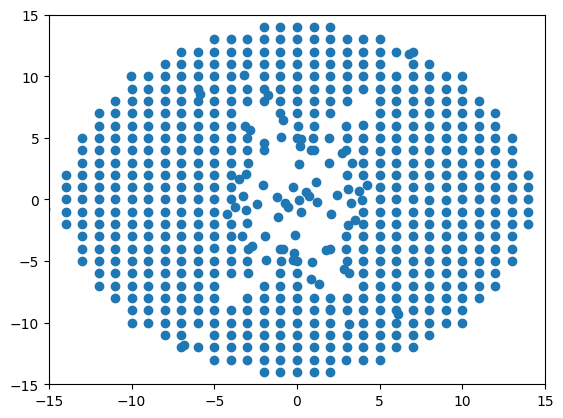

In [67]:
plt.scatter(g.rs[50,:,0],g.rs[50,:,1])
plt.xlim(-15,15)
plt.ylim(-15,15)

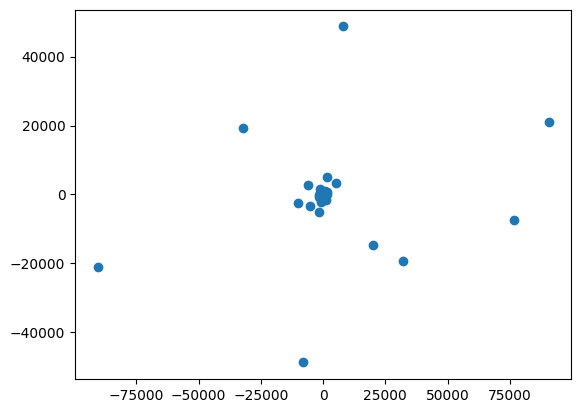

In [61]:
plt.scatter(g.rs[-10,:,0],g.rs[-10,:,1])